In [ ]:
# Install necessary libraries
!pip install numpy pandas matplotlib statsmodels scikit-learn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [ ]:
# Load your data
data = pd.read_csv("/content/DailyDelhiClimateTest.csv", parse_dates=['date'], index_col='date')
print(data.head())


             meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  18.500000  77.222222    2.894444   1018.277778
2017-01-03  17.111111  81.888889    4.016667   1018.333333
2017-01-04  18.700000  70.050000    4.545000   1015.700000
2017-01-05  18.388889  74.944444    3.300000   1014.333333


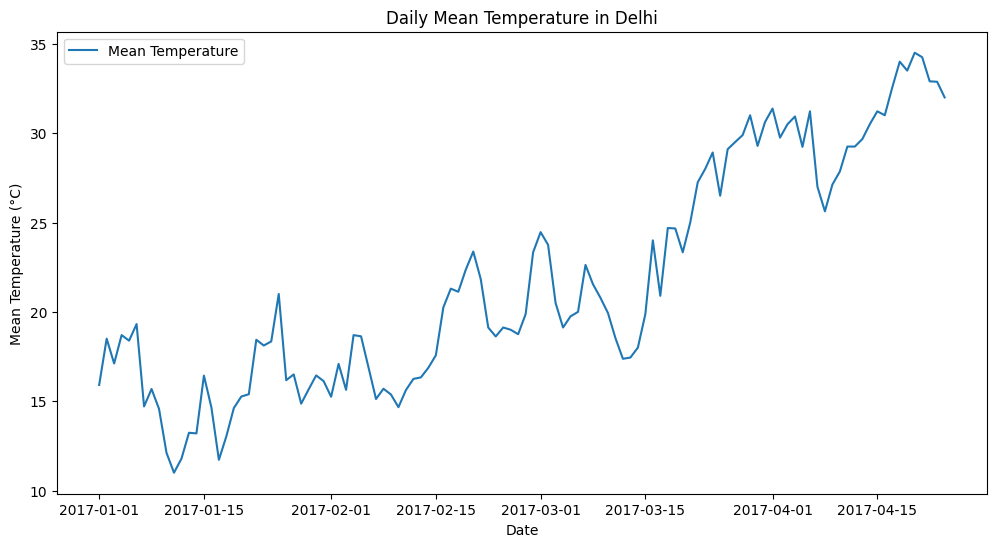

In [ ]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(data['meantemp'], label='Mean Temperature')
plt.title('Daily Mean Temperature in Delhi')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()


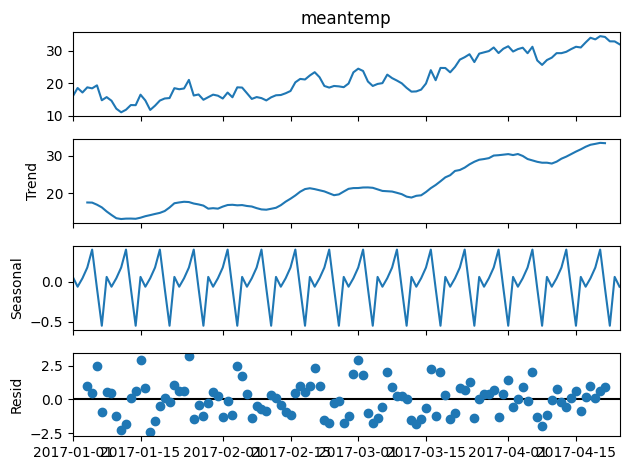

In [ ]:
# Decompose the time series
decomposition = seasonal_decompose(data['meantemp'], model='additive')
decomposition.plot()
plt.show()


In [ ]:
# Perform the ADF test
adf_result = adfuller(data['meantemp'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')


ADF Statistic: -1.096474275875619
p-value: 0.7164758731775932


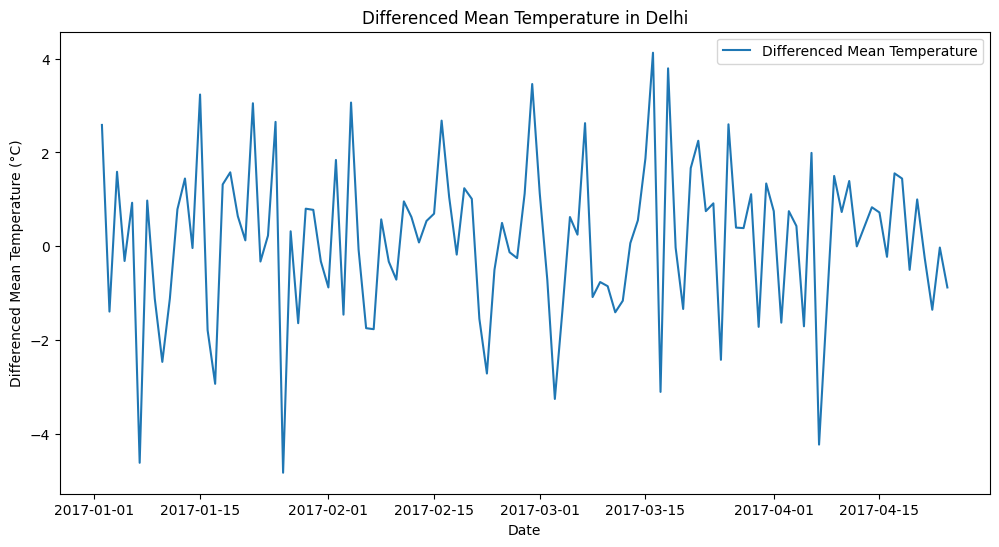

In [ ]:
# Differencing to achieve stationarity
data_diff = data['meantemp'].diff().dropna()
plt.figure(figsize=(12, 6))
plt.plot(data_diff, label='Differenced Mean Temperature')
plt.title('Differenced Mean Temperature in Delhi')
plt.xlabel('Date')
plt.ylabel('Differenced Mean Temperature (°C)')
plt.legend()
plt.show()


In [ ]:
# Build and train an ARIMA model
model = ARIMA(data['meantemp'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                  114
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -218.781
Date:                Sat, 08 Mar 2025   AIC                            443.562
Time:                        11:11:10   BIC                            451.744
Sample:                    01-01-2017   HQIC                           446.882
                         - 04-24-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1196      0.831     -0.144      0.886      -1.749       1.510
ma.L1         -0.0034      0.854     -0.004      0.997      -1.676       1.670
sigma2         2.8129      0.362      7.769      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2017-04-25    32.107680
2017-04-26    32.094799
2017-04-27    32.096340
2017-04-28    32.096156
2017-04-29    32.096178
2017-04-30    32.096175
2017-05-01    32.096176
2017-05-02    32.096176
2017-05-03    32.096176
2017-05-04    32.096176
2017-05-05    32.096176
2017-05-06    32.096176
2017-05-07    32.096176
2017-05-08    32.096176
2017-05-09    32.096176
2017-05-10    32.096176
2017-05-11    32.096176
2017-05-12    32.096176
2017-05-13    32.096176
2017-05-14    32.096176
2017-05-15    32.096176
2017-05-16    32.096176
2017-05-17    32.096176
2017-05-18    32.096176
2017-05-19    32.096176
2017-05-20    32.096176
2017-05-21    32.096176
2017-05-22    32.096176
2017-05-23    32.096176
2017-05-24    32.096176
2017-05-25    32.096176
Freq: D, Name: predicted_mean, dtype: float64


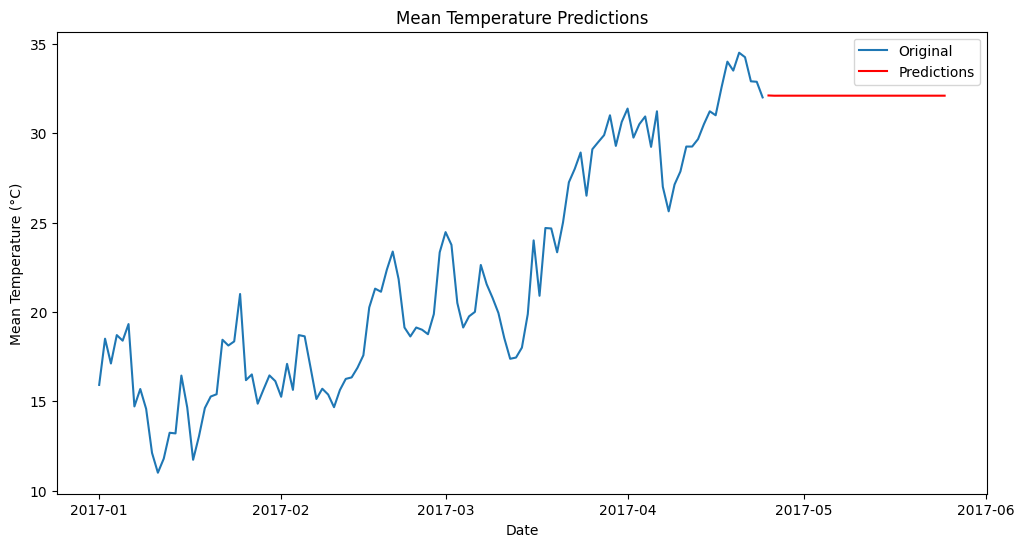

In [ ]:
# Make predictions
predictions = model_fit.predict(start=len(data), end=len(data) + 30, typ='levels')
print(predictions)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(data['meantemp'], label='Original')
plt.plot(predictions, label='Predictions', color='red')
plt.title('Mean Temperature Predictions')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model
# predictions is 31 data points long, starting after the original data
# we can only compare against the last 31 points of the original data
mse = mean_squared_error(data['meantemp'][-len(predictions):], predictions)  # Compare the last 31 actual values to the 31 predictions
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7.639461958787117
